> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
  > How does being on scholarship influence the tendency of a patient to show up for his or her           appointment ?
  
   >How does receiving SMS notification influence the tendency of a patient to show up for his or         her appointment ?
   
   >Which neighbourhood has the highest tendency not to show up?
   
   >What is the percentage of said neighbourhood on the total percentage that showed up?
   
   >How does been on scholarship and receiving sms affect showing up? 
   
   >Above question for the neighbourhood with the highest show rate?
   
   >Distribution of those that came for appointment across age ggroups?

 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.


In [4]:
#view data frame
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [5]:
# inspect dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### For clarity, we will rename some columns. Namely:
'ScheduledDay' to 'Scheduled_Day'
'AppointmentDay' to 'Appointment_Day'

#### Subsequently, for ease convert all to lower case

#### Lastly drop duplicate values


In [7]:
# Renaming of the columns
df.rename(columns = {'ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day'}, inplace = True)

# Conversion of all column title to lower case
df.rename(columns=str.lower, inplace=True)

# First we drop all duplicate values
df.drop_duplicates(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid          110527 non-null float64
appointmentid      110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no-show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


#### No null value seen anywhere.
#### 'ScheduledDay' and 'AppointmentDay' are object data type instead of time

In [8]:

def dtype_time(column):
    #to change the data type from string to date time
    df[column] = df[column].str.replace('-', '').str.replace('Z', '').str.replace('T', '').str.replace(':', '')
    data = df[column] = pd.to_datetime(df[column], format='%Y%m%d%H%M%S')
    
    return data

df['scheduled_day'] = dtype_time('scheduled_day')
df['appointment_day'] = dtype_time('appointment_day')

# See changes to datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid          110527 non-null float64
appointmentid      110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no-show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


#### We need to see the nature of values we have in dataframe 
#### So we make use of describe()

In [9]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From description of data, we see 'age' has a negative minimum value
Further investigation is needed

In [10]:
(df['age'] < 0).value_counts()

False    110526
True          1
Name: age, dtype: int64

From above it is observe that we have only on negative value. Age can not be negative, so we need to drop said value

In [11]:
df.drop(df.loc[df['age'] < 0].index, inplace=True)

#Confirmatory test
(df['age'] < 0).value_counts()

False    110526
Name: age, dtype: int64

In [12]:
print(df.nunique())

print(df.info())

patientid           62298
appointmentid      110526
gender                  2
scheduled_day      103548
appointment_day        27
age                   103
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no-show                 2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patientid          110526 non-null float64
appointmentid      110526 non-null int64
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null int64
hipertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handcap            110526 non-null int6

It would be also nice to sort the  'AppointmentDay' into individual days of the week and months of the year. For better understanding of data

In [13]:
df['appointment_month'] = pd.to_datetime(df['appointment_day']).dt.month_name()
df['appointment_day_name'] = pd.to_datetime(df['appointment_day']).dt.day_name()


In [14]:
#To see dataframe
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,appointment_month,appointment_day_name
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,April,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,April,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,April,Friday


From observation patientid','appointmentid','scheduled_day', and 'appointment_day' will not be needed. So in my view we should drop them

In [15]:
df.drop(['patientid','appointmentid','scheduled_day', 'appointment_day'], axis = 1, inplace=True)

In [16]:
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,appointment_month,appointment_day_name
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday


#### To see distribution. We employ the histogram.

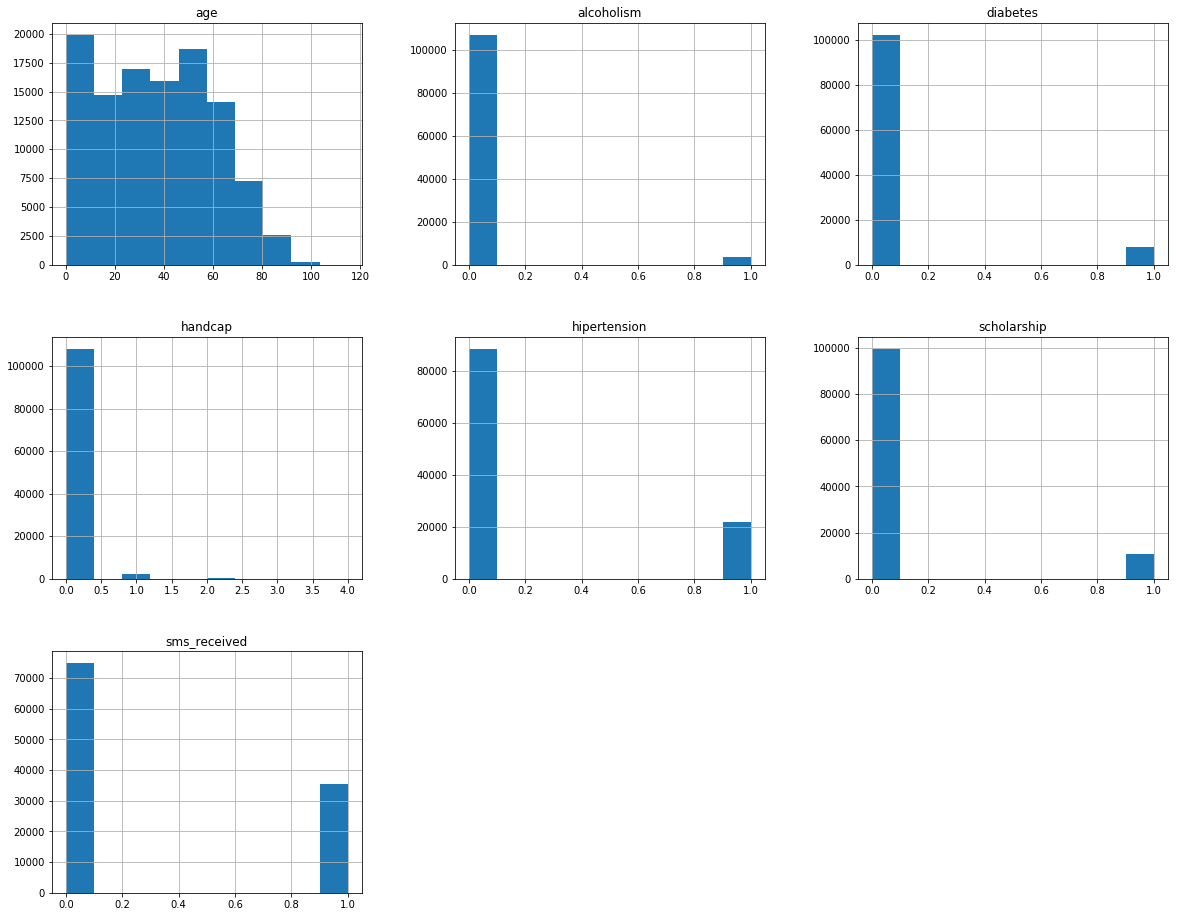

In [17]:
df.hist(figsize=(20,16));

In [18]:
#To see number of unique values per Column
df.nunique()

gender                    2
age                     103
neighbourhood            81
scholarship               2
hipertension              2
diabetes                  2
alcoholism                2
handcap                   5
sms_received              2
no-show                   2
appointment_month         3
appointment_day_name      6
dtype: int64

We need to sort out the data into those that showed up and those that did not. First in my view, i switch from yes or no to 'True' or 'False'

In [19]:
df = df.replace({'Yes': True, 'No': False})

We need to seperate dataframe into two
1. those that **"SHOWED UP FOR THEIR APPOINTMENT"** named **'s'**
2. those that **"DID NOT SHOW UP FOR THEIR APPOINTMENT"** named **'ns'**

In [20]:
ns = df.loc[df['no-show'] == True]
s = df.loc[df['no-show'] == False]

See size of the two dataframes

In [21]:
print("shape of the dataframe for those that showed up titled s is ", s.shape)
print("shape of the dataframe for those that did not show up titled ns is ",ns.shape)

shape of the dataframe for those that showed up titled s is  (88207, 12)
shape of the dataframe for those that did not show up titled ns is  (22319, 12)


###### In my view the data has been cleaned sufficent enough

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 ( Relationship with Day of the Week)

## MEASUREMENT FUNCTIONS

In [22]:
def percentage_distribution(column):
    ##function to return the percentage distribution of each unique value in column
    count = s[column].value_counts(sort=False)
    ratio = count/count.sum()
    percentage = ratio * 100
    #round up value to 2 decimal points
    round(percentage, 2)
    
    
    return percentage


def percentage_no_show(column):
    ##function to return the rate of no show for each unique value in a column
    
    ratio = ns[column].value_counts(sort=False)/(df[column].value_counts(sort=False))
    
    percentage = ratio * 100
    #round up value to 2 decimal points
    round(percentage, 2)
    
    
    return percentage

### Research Question 1: How does being on scholarship influence the tendency of a patient to show up for his or her appointment ?

In [23]:
#let see the distripution of patients that showed up along the scholarship

percentage_distribution('scholarship')

0    90.609589
1     9.390411
Name: scholarship, dtype: float64

We can see that 9 out of every person that showed up was on scholarship.

In [24]:
# let see the percentage that did not show up for those with scholarship and does with not

percentage_no_show('scholarship')

0    19.807355
1    23.736304
Name: scholarship, dtype: float64

We can see not on scholarship are less likely to show up

### Research Question 2 : How does receiving SMS notification influence the tendency of a patient to show up for his or her appointment ?

In [25]:
#let see the distripution of patients that showed that received SMS notification

percentage_distribution('sms_received')

0    70.866258
1    29.133742
Name: sms_received, dtype: float64

We can see that 7 out of every person that showed received an SMS notification


In [26]:
# let see the percentage that did not show up that received SMS notification and does with not

percentage_no_show('sms_received')

0    16.703534
1    27.574545
Name: sms_received, dtype: float64

We can see those that did not received SMS notificetion are less likely to show up

### Research Question 3 : Which neighbourhood has the highest tendency not to show up?
### What is the percentage of said neighbourhood on the total percentage that showed up?

In [27]:
# let see the percentage that did not show up from each neighbourhood

percentage_no_show('neighbourhood').describe()

count     80.000000
mean      20.799572
std        9.503903
min        8.571429
25%       18.046051
50%       19.765045
75%       21.770890
max      100.000000
Name: neighbourhood, dtype: float64

From above, we can see that the maximum percentage of neighbourhood that did not show is 100%
and lowest is 8.571429

In [28]:
#neighbourhood were nobody showed up

print("Nobody from ", percentage_no_show('neighbourhood').idxmax(), " showed up for their appointment")
print("While ", percentage_no_show('neighbourhood').idxmin(), " had the highest show up rate")

Nobody from  ILHAS OCEÂNICAS DE TRINDADE  showed up for their appointment
While  ILHA DO BOI  had the highest show up rate


### Research Question 4 : How does been on scholarship and receiving sms affect showing up?

In [29]:
len(s.loc[(s['sms_received'] == 0) & (s['scholarship'] == 0)])/len(s)

0.6410715702835376

6 out of every 10 persons that showed up received SMS and are on scholarship

#### Research Question 5 : Above question for the neighbourhood with the highest show rate?

In [30]:
len(s.loc[(s['sms_received'] == 0) & (s['neighbourhood'] == 'ILHA DO BOI')&(s['scholarship'] == 0)])/len(s.loc[(s['neighbourhood'] == 'ILHA DO BOI')])

0.8125

#### Research Question 6: Distribution of those that came for appointment across age ggroups?

In [31]:
#Distribution for show with age 

# Intervals of the ages
age = pd.cut(s['age'], bins=[0, 19, 36, 61, 116], labels=['Children','Youths', 'Adults', 'Elderly'],include_lowest=True)

In [32]:
count = age.value_counts(sort=False)
ratio = count *100/count.sum()
print("Distribution of those that showed up about age \n \n", ratio)

Distribution of those that showed up about age 
 
 Children    26.834605
Youths      20.938248
Adults      34.526738
Elderly     17.700409
Name: age, dtype: float64


# TO SHOW LIMITATION 



In [33]:
columns = ["gender", "scholarship", "hipertension", "diabetes", "alcoholism", "handcap", "sms_received", "appointment_month"]

In [34]:
#columns

In [35]:
for i in columns:
    print("Rate of NO SHOW FOR each distict value of ", i,"\n", "\n", percentage_no_show(i), "\n")

Rate of NO SHOW FOR each distict value of  gender 
 
 M    19.967948
F    20.314871
Name: gender, dtype: float64 

Rate of NO SHOW FOR each distict value of  scholarship 
 
 0    19.807355
1    23.736304
Name: scholarship, dtype: float64 

Rate of NO SHOW FOR each distict value of  hipertension 
 
 0    20.903917
1    17.301959
Name: hipertension, dtype: float64 

Rate of NO SHOW FOR each distict value of  diabetes 
 
 0    20.363023
1    18.003273
Name: diabetes, dtype: float64 

Rate of NO SHOW FOR each distict value of  alcoholism 
 
 0    20.194838
1    20.148810
Name: alcoholism, dtype: float64 

Rate of NO SHOW FOR each distict value of  handcap 
 
 0    20.235490
1    17.923604
2    20.218579
3    23.076923
4    33.333333
Name: handcap, dtype: float64 

Rate of NO SHOW FOR each distict value of  sms_received 
 
 0    16.703534
1    27.574545
Name: sms_received, dtype: float64 

Rate of NO SHOW FOR each distict value of  appointment_month 
 
 June     18.457467
April    19.567233






<a id='#conclusions'></a>




# Conclusions From data exploration

> From EDA, we found the following
1. 9 out of every 10 persons that showed up were on scholarship.
2. 7 out of every 10 persons that showed up received an SMS notification.
3. Nobody from "ILHAS OCEÂNICAS DE TRINDADE" showed up for their appointment.
4. 64 out of every 100 persons that showed up received an SMS notification and also were on scholarship.
5. In the neighbourhood, "ILHA DO BOI" with the highest show up rate (NB: not show up number) 81 out of every 100 of them received SMS notification and were on scholarship.
6. Of those that showed up, the bulk constituted of Adults (Aged between 35 to 60) followed closely by Children (Age 0 to 18) with percentages of 35% and 25% respectively.





> **LIMITATIONS**

The major limitation was it is impossible to draw clear distinction, if factors affect probability of showing up.
We can see that from **"TO SHOW LIMITATION"** that for most variable have no significant impact on if the said patient will show.

## Visualization

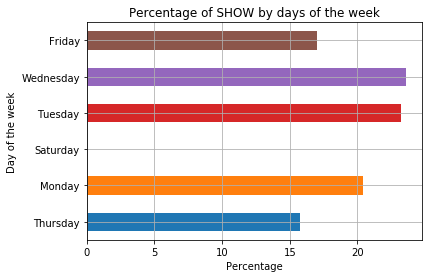

In [36]:
percentage_distribution('appointment_day_name').plot(kind='barh')

plt.title("Percentage of SHOW by days of the week")
plt.xlabel("Percentage")
plt.ylabel("Day of the week")
plt.xticks(rotation=0, horizontalalignment="center")

plt.grid()

From above, we see Most people were appointed showed up Tuesdays and Wednesdays.
Accomodating more than 50% of the people that showed up for their appointment.|

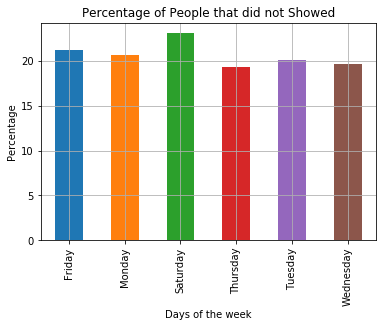

In [37]:
percentage_no_show('appointment_day_name').plot(kind='bar')

plt.title("Percentage of People that did not Showed")
plt.xlabel("Days of the week")
plt.ylabel("Percentage")
plt.xticks(rotation=90, horizontalalignment="center")
plt.grid(axis='both')

In [38]:
print("We can see the STD as ", percentage_no_show('appointment_day_name').std())

We can see the STD as  1.35115827012


We can imply that data appointed does no have significant impact on whether a person will show up

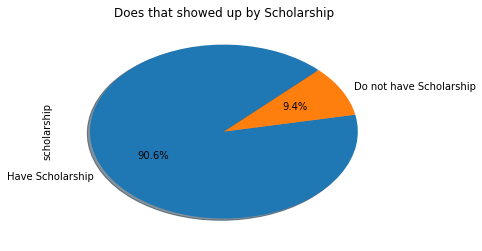

In [39]:
labels = 'Have Scholarship', 'Do not have Scholarship'
percentage_distribution('scholarship').plot.pie(title= 'Does that showed up by Scholarship', autopct='%1.1f%%', legend=False, labels=labels, shadow=True, startangle=45);

From above, we can see 9 out of every 10 person that showed up are on scholarship

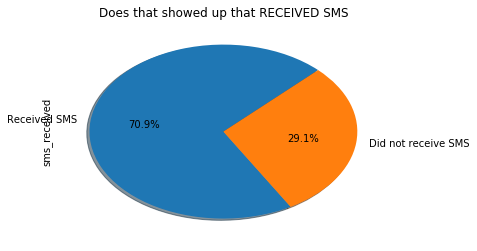

In [40]:
labels = 'Received SMS', 'Did not receive SMS'
percentage_distribution('sms_received').plot.pie(title= 'Does that showed up that RECEIVED SMS', autopct='%1.1f%%', legend=False, labels=labels, shadow=True, startangle=45);

From above, we can see that 7 out of every 10 persons that showed up received an SMS

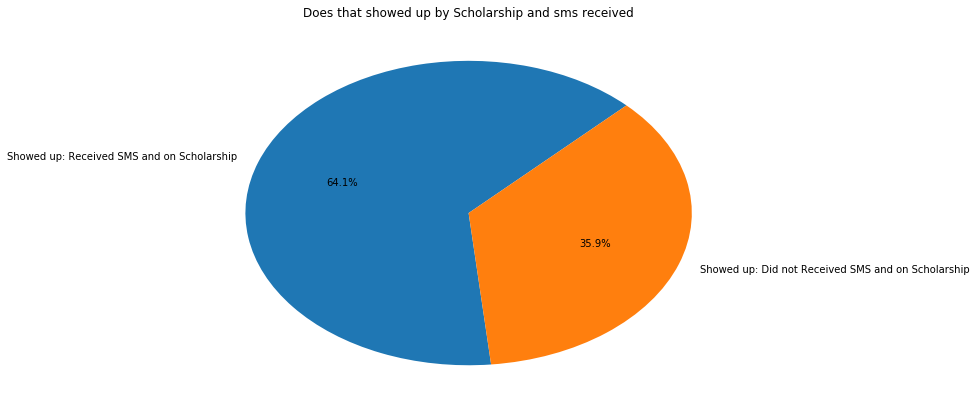

In [41]:
# Creating dataset
labels2 = ['Showed up: Received SMS and on Scholarship', 'Showed up: Did not Received SMS and on Scholarship']
A =  len(s.loc[(s['sms_received'] == 0) & (s['scholarship'] == 0)])/len(s)
data1 = [A, 1-A]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data1, labels = labels2,startangle=45, autopct='%1.1f%%')
plt.title('Does that showed up by Scholarship and sms received')
# show plot
plt.show()


From above, we can see that 64 out of every 100 persons that showed up received an SMS and is on scholarship

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0